In [1]:
#importing the required libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#importing the dataset
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')


In [7]:
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [8]:
delivery.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [9]:
#checking the dataset information 

match_info = match.info()
delivery_info = delivery.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [10]:
#Extract the team name which where participating in the ipl

Team_list = match['team1'].tolist() 
Team_list = Team_list + match['team2'].tolist()

Team_list= list(set(Team_list))


In [15]:
Team_list

['Delhi Capitals',
 'Kolkata Knight Riders',
 'Pune Warriors',
 'Delhi Daredevils',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Rising Pune Supergiant',
 'Kings XI Punjab',
 'Sunrisers Hyderabad',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Gujarat Lions',
 'Kochi Tuskers Kerala',
 'Deccan Chargers',
 'Chennai Super Kings']

In [37]:
#most player of the match top 5

player = match['player_of_match']
player = player.value_counts()
player.head()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

In [43]:
#Umpires in the ipl

umpire = match['umpire1'].tolist() + match['umpire2'].tolist()
umpire = list(set(umpire))
umpire

['GA Pratapkumar',
 'K Srinath',
 'Aleem Dar',
 'SD Ranade',
 'Asad Rauf',
 'AV Jayaprakash',
 'PR Reiffel',
 'S Ravi',
 'S Das',
 'Subroto Das',
 'RM Deshpande',
 'BG Jerling',
 'K Hariharan',
 'JD Cloete',
 'S Asnani',
 'RE Koertzen',
 'HDPK Dharmasena',
 'MR Benson',
 'RK Illingworth',
 'CB Gaffaney',
 'A Deshmukh',
 'IJ Gould',
 'I Shivram',
 'TH Wijewardene',
 'VA Kulkarni',
 'BNJ Oxenford',
 'UV Gandhe',
 'AY Dandekar',
 'AK Chaudhary',
 'K Bharatan',
 'AL Hill',
 'RB Tiffin',
 'C Shamshuddin',
 'PG Pathak',
 'BR Doctrove',
 'Nitin Menon',
 'KN Ananthapadmanabhan',
 'RJ Tucker',
 'M Erasmus',
 'IL Howell',
 'NJ Llong',
 'SS Hazare',
 'SJA Taufel',
 'K Srinivasan',
 'SJ Davis',
 'CK Nandan',
 'GAV Baxter',
 'A Nand Kishore',
 'SL Shastri',
 'AM Saheba',
 'DJ Harper',
 'SK Tarapore',
 'VK Sharma',
 'BF Bowden',
 'YC Barde',
 'SD Fry']

<AxesSubplot:>

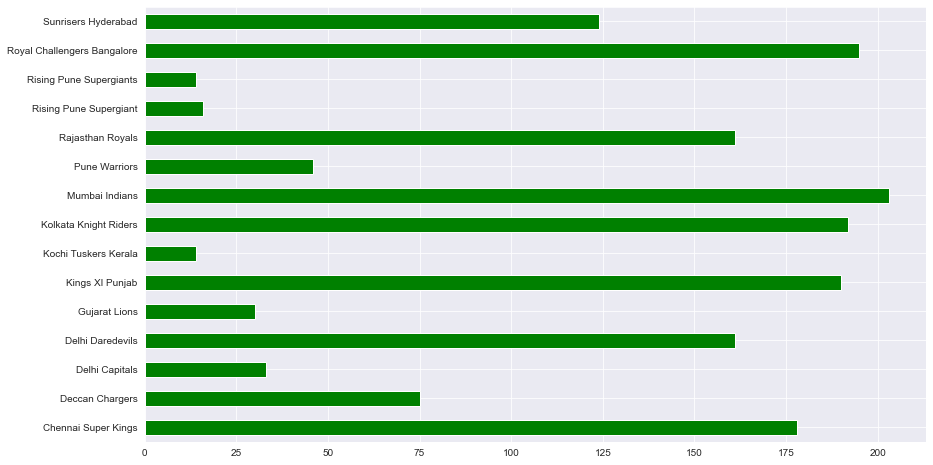

In [23]:
#Matches per team
Host = match['team1'].value_counts()
guest = match['team2'].value_counts()
(Host+guest).plot(kind='barh', color ='green')
# (Host+guest).plot(kind='pie')

C:\Users\rupes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'M Chinnaswamy Stadium'),
  Text(1, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(2, 0, 'Feroz Shah Kotla'),
  Text(3, 0, 'Wankhede Stadium'),
  Text(4, 0, 'Eden Gardens'),
  Text(5, 0, 'Sawai Mansingh Stadium'),
  Text(6, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(7, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(8, 0, 'Dr DY Patil Sports Academy'),
  Text(9, 0, 'Newlands'),
  Text(10, 0, "St George's Park"),
  Text(11, 0, 'Kingsmead'),
  Text(12, 0, 'SuperSport Park'),
  Text(13, 0, 'Buffalo Park'),
  Text(14, 0, 'New Wanderers Stadium'),
  Text(15, 0, 'De Beers Diamond Oval'),
  Text(16, 0, 'OUTsurance Oval'),
  Text(17, 0, 'Brabourne Stadium'),
  Text(18, 0, 'Sardar Patel Stadium, Motera'),
  Text(19, 0, 'Barabati Stadium'),
  Text(20, 0, 'Vidarbha Cricket Association Stadium, Ja

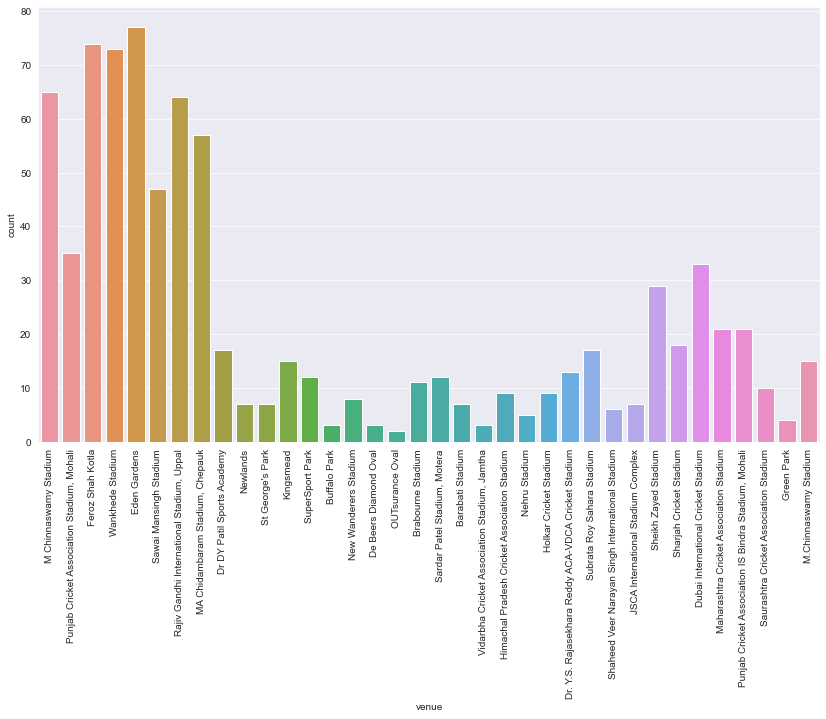

In [14]:
#Number of matches per venue
sns.countplot('venue', data=match)
plt.xticks(rotation='vertical')

Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


C:\Users\rupes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Kolkata Knight Riders'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Daredevils'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Deccan Chargers'),
  Text(7, 0, 'Mumbai Indians'),
  Text(8, 0, 'Pune Warriors'),
  Text(9, 0, 'Kochi Tuskers Kerala'),
  Text(10, 0, 'Sunrisers Hyderabad'),
  Text(11, 0, 'Rising Pune Supergiants'),
  Text(12, 0, 'Gujarat Lions'),
  Text(13, 0, 'Rising Pune Supergiant'),
  Text(14, 0, 'Delhi Capitals')])

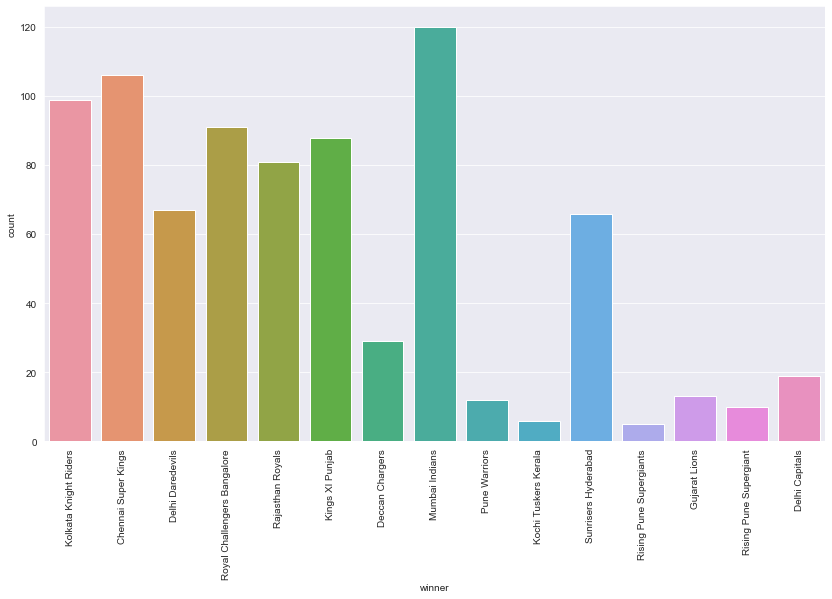

In [46]:
#Match won by each team
wins=pd.DataFrame({"Winner":match['winner']}).value_counts()
print(wins)

#sns plot
sns.countplot('winner', data=match)
plt.xticks(rotation='vertical')

In [50]:
#Match won using different method

result = match['result']
result = result.value_counts()
result

wickets    435
runs       364
tie         13
Name: result, dtype: int64

            batsman  batsman_runs
505         V Kohli          5878
438        SK Raina          5368
116       DA Warner          5254
379       RG Sharma          5230
407        S Dhawan          5197
24   AB de Villiers          4849
96         CH Gayle          4772
301        MS Dhoni          4632
398      RV Uthappa          4607
154       G Gambhir          4217


<AxesSubplot:xlabel='batsman'>

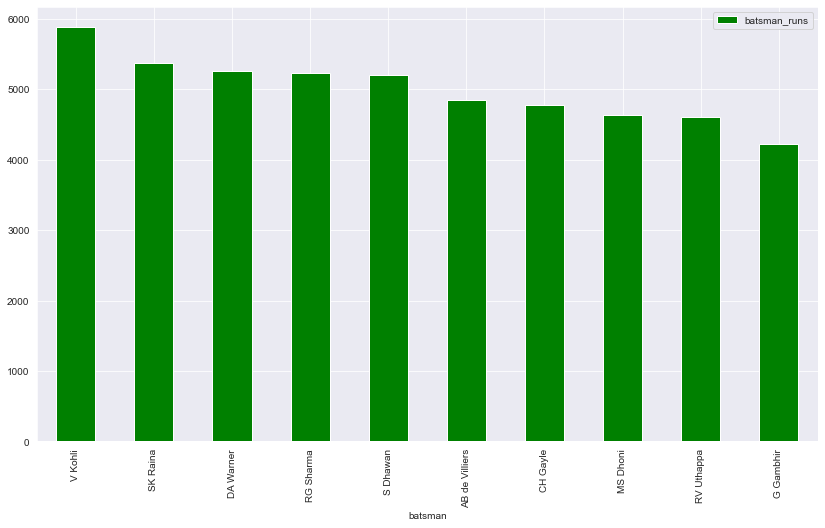

In [58]:
#most runs by a Batsman

TopScrore = delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(10)
print(TopScrore)
TopScrore.set_index('batsman', inplace=True)
TopScrore.plot(kind='bar', color='green')

              bowler  total_runs
276        PP Chawla        4330
133  Harbhajan Singh        4038
6           A Mishra        3913
99          DJ Bravo        3869
281         R Ashwin        3756
396         UT Yadav        3672
293        RA Jadeja        3515
350       SL Malinga        3486
264          P Kumar        3342
57           B Kumar        3333


<AxesSubplot:xlabel='bowler'>

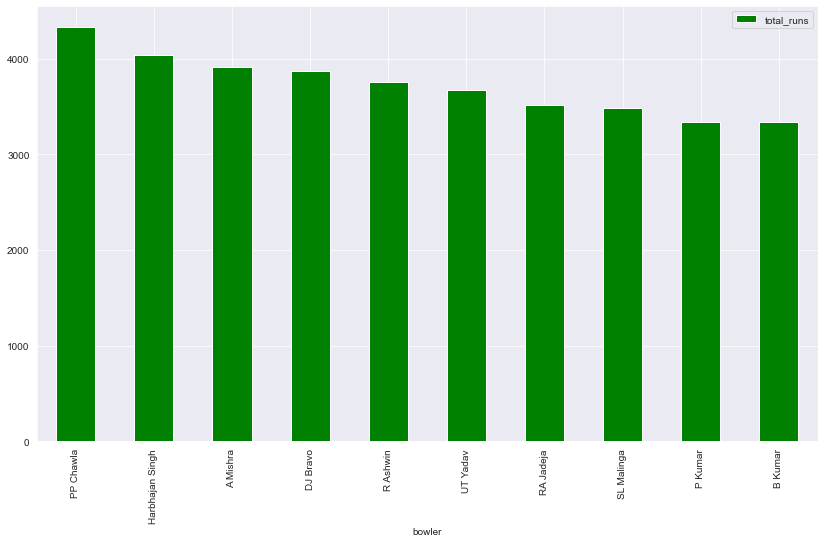

In [64]:
#most run consided by a baller
TopRunGiver = delivery.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)
print(TopRunGiver)

TopRunGiver.set_index('bowler', inplace=True)
TopRunGiver.plot(kind='bar', color='green')

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64


C:\Users\rupes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'run out'),
  Text(2, 0, 'bowled'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'retired hurt'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'caught and bowled'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

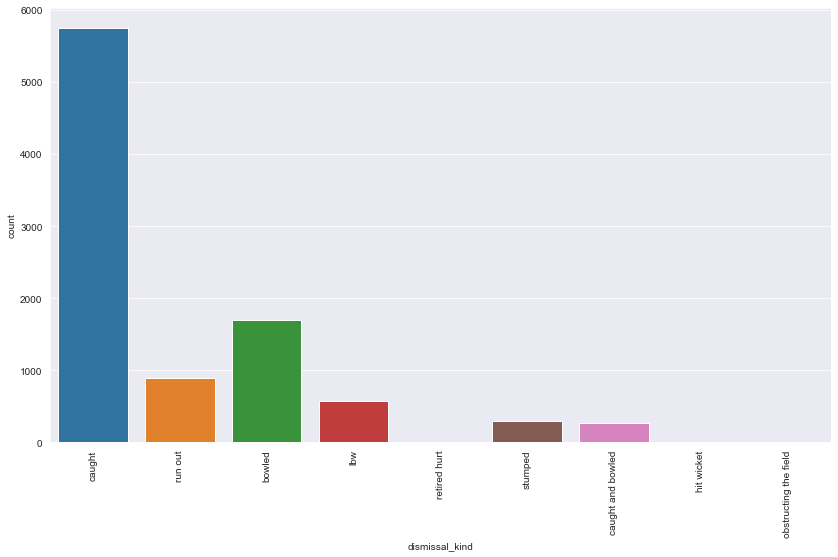

In [75]:
#Most Commomn kind of dismisal
Dismisal = delivery['dismissal_kind'].value_counts()
print(Dismisal)

sns.countplot('dismissal_kind', data=delivery)
plt.xticks(rotation=90)



<AxesSubplot:xlabel='bowler'>

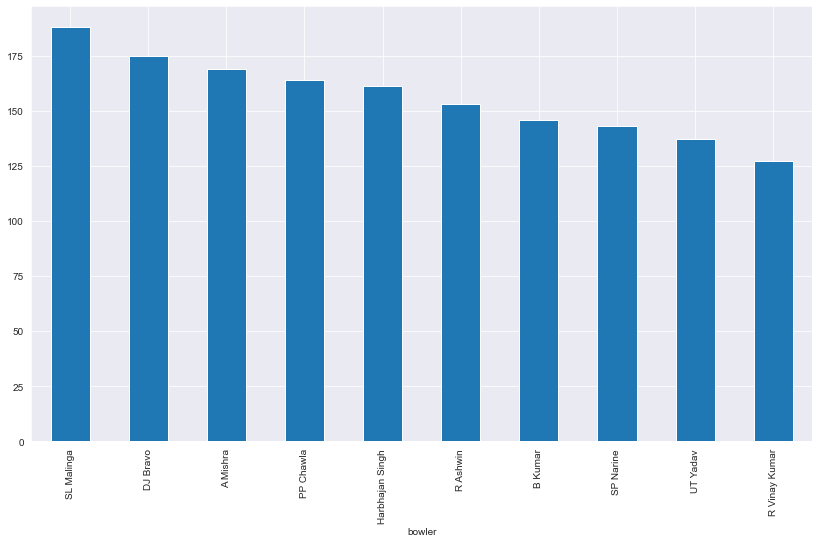

In [77]:
#Most wicket by a bowler
delivery.groupby('bowler')['player_dismissed'].agg('count').sort_values(ascending=False).head(10).plot(kind='bar')


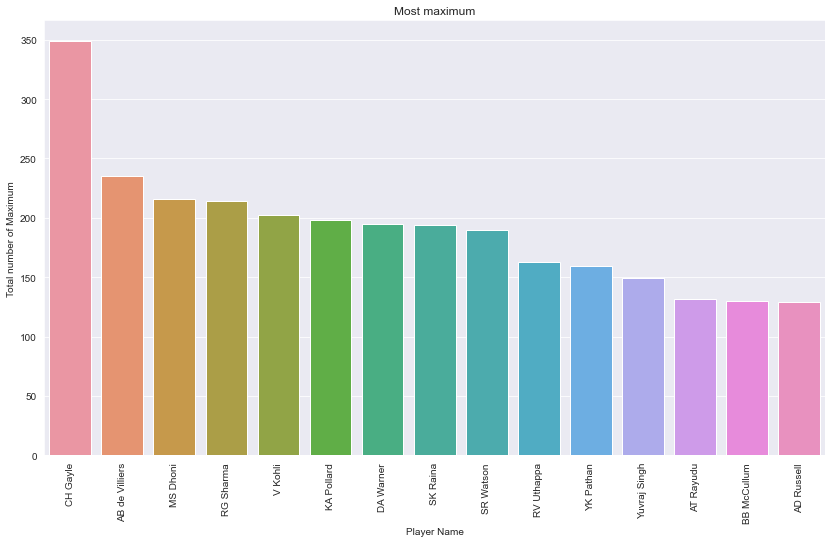

In [84]:
#Most six hit by the bastmen

Six = delivery.groupby('batsman')['batsman_runs'].agg(
    lambda x:(x==6).sum()).reset_index().sort_values(
    by='batsman_runs', ascending=False).head(15).reset_index(drop=True)

sns.barplot(x=Six['batsman'],y=Six['batsman_runs'],data=Six)

plt.title("Most maximum")
plt.xticks(rotation=90)
plt.xlabel("Player Name")
plt.ylabel("Total number of Maximum")
plt.show()

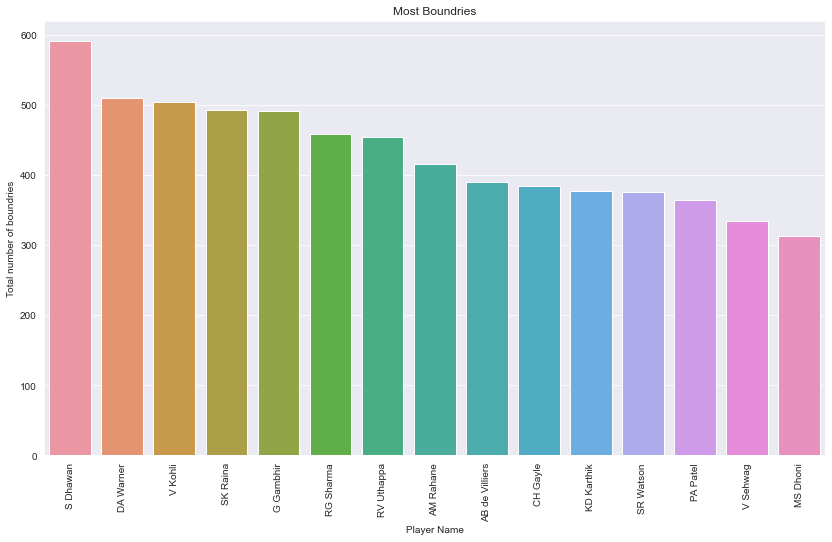

In [85]:
#Most Four hit by the bastmen

Six = delivery.groupby('batsman')['batsman_runs'].agg(
    lambda x:(x==4).sum()).reset_index().sort_values(
    by='batsman_runs', ascending=False).head(15).reset_index(drop=True)

sns.barplot(x=Six['batsman'],y=Six['batsman_runs'],data=Six)

plt.title("Most Boundries")
plt.xticks(rotation=90)
plt.xlabel("Player Name")
plt.ylabel("Total number of boundries")
plt.show()